In [1]:
import numpy as np
import pandas as pd
import scipy
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Limpieza de datos

dataEval = pd.read_csv ("./data/asteroidEval.csv")
dataTrain = pd.read_csv ("./data/asteroidTrain.csv")

# Eliminamos las columnas que no nos interesan
dataTrain = dataTrain.drop(
        columns=[
            "full_name", "G", "extent", "rot_per", "GM", "BV", "UB", "IR", "spec_B", "spec_T", "data_arc", "n_obs_used", "neo", "pha"
        ]
    )
dataTrain = dataTrain[dataTrain["H"].notna()]
dataTrain = dataTrain[dataTrain["albedo"].notna()]
dataTrain = dataTrain.dropna(axis=1)

# Creamos las variables para el modelo
x = dataTrain[["a", "q", "H", "albedo", "moid"]]
y = dataTrain[["diameter"]]

print(x.shape)
print(y.shape)

# Normalizamos los datos
# scaler = StandardScaler()
# x = scaler.fit_transform(x)
# y = scaler.fit_transform(y)

C:\Users\satel\AppData\Local\Temp/ipykernel_18304/1494388813.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.


(98923, 5)
(98923, 1)


C:\Users\satel\AppData\Local\Temp/ipykernel_18304/1494388813.py:4: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.


In [11]:
# Entrenamos el modelo
model = MLPRegressor(hidden_layer_sizes=(3, 4), activation='relu', solver='adam', max_iter=100)
model.fit(x, y)

# predicciones
predictions = model.predict(x)

# Evaluacion del modelo
print("R2:", r2_score(y, predictions))
print("MSE:", mean_squared_error(y, predictions))


c:\Users\satel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


R2: 0.9613447658635552
MSE: 3.1838871289207953


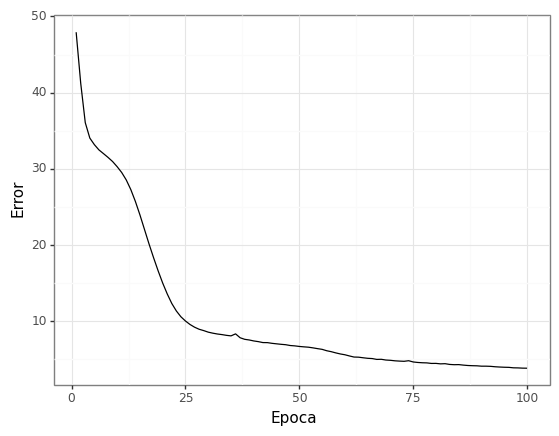

<ggplot: (109867707399)>

In [10]:
model.loss_curve_
tempdf = pd.DataFrame(model.loss_curve_, columns= ["Error"])
tempdf["Epoca"] = range(1,tempdf.shape[0]+1)
ggplot(tempdf)+aes(x="Epoca", y = "Error")+theme_bw()+geom_line()


In [13]:
dataEval = dataEval[dataEval["H"].notna()]
dataEval = dataEval[dataEval["albedo"].notna()]
dataEval = dataEval.dropna(axis=1)

x = dataEval[["a", "q", "H", "albedo", "moid"]]

# x = scaler.fit_transform(x)

predictions = model.predict(x)
# convert the predictions array to a dataframe
predictions = pd.DataFrame(predictions)
print(predictions.describe())

predictions.to_csv("./data/predictions.csv")


                  0
count  37251.000000
mean       5.627864
std        9.502403
min      -13.466431
25%        3.164659
50%        4.278905
75%        5.456142
max      538.046511


In [14]:
x = dataTrain[["a", "q", "H", "albedo", "moid"]]

# x = scaler.fit_transform(x)

predictions = model.predict(x)
# convert the predictions array to a dataframe
predictions = pd.DataFrame(predictions)
print(predictions.describe())

predictions.to_csv("./data/predictions.csv")

                  0
count  98923.000000
mean       5.617591
std        9.040912
min      -16.665672
25%        3.182325
50%        4.294176
75%        5.467267
max      682.892448


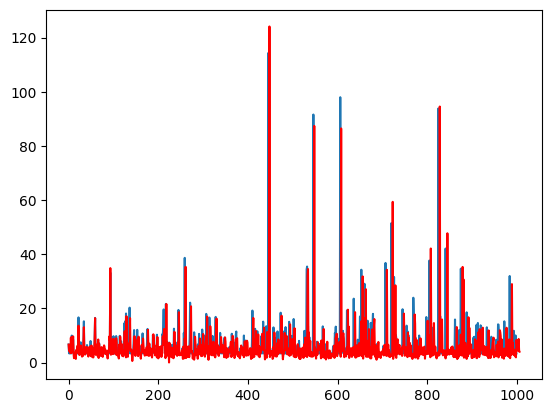

In [7]:
# do the same but only the first 1000 values
plt.plot(predictions[:1000])
plt.plot(y[:1000], color="red")